# Pixel binning

In this part of the analysis, we will perform pixel binning to maximize the signal-to-noise ratio of the spatially resolved SEDs.

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
filters = ['hst_acs_f435w', 'hst_acs_f475w', 'hst_acs_f555w', 'hst_acs_f606w', 'hst_acs_f625w', 'hst_acs_f775w', 
           'hst_acs_f814w', 'hst_acs_f850lp', 'jwst_nircam_f115w', 'jwst_nircam_f150w', 'jwst_nircam_f200w', 
           'jwst_nircam_f277w', 'jwst_nircam_f356w', 'jwst_nircam_f444w', 'jwst_nircam_f480m']
nbands = len(filters)

## Perform pixel binning

Pixel binning of photometric data cube can be performed using `pixel_binning` function.

In [3]:
from piXedfit.piXedfit_bin import pixel_binning

fits_fluxmap = "fluxmap.fits" 

SNR = np.zeros(nbands)
SNR[8:nbands] = 5.0
        
pixel_binning(fits_fluxmap, ref_band=11, Dmin_bin=7.0, SNR=SNR, redc_chi2_limit=5.0, del_r=2.0, name_out_fits=None)

Bins: 78 ==> accumulated pixels: 3711/3711
Number of bins: 78


'pixbin_fluxmap.fits'

## Plot binning map

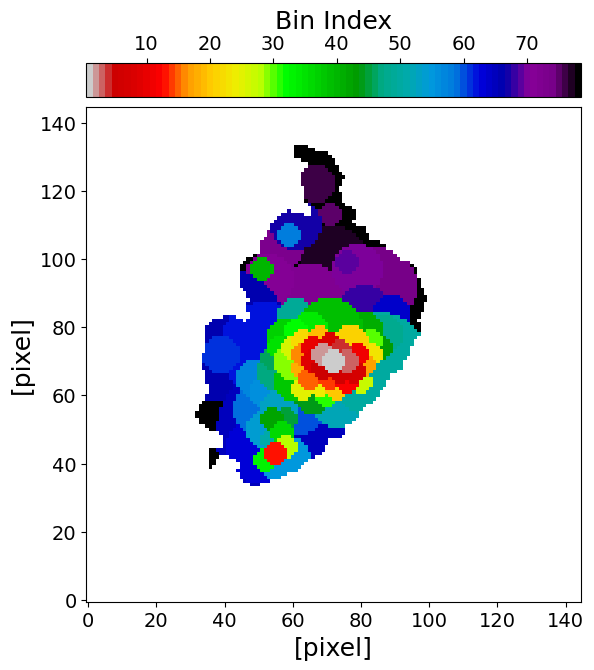

In [4]:
%matplotlib inline

from piXedfit.piXedfit_bin import plot_binmap

binmap_fits = "pixbin_fluxmap.fits"
plot_binmap(binmap_fits, plot_binmap_spec=False)

## Plot SEDs of spatial bins

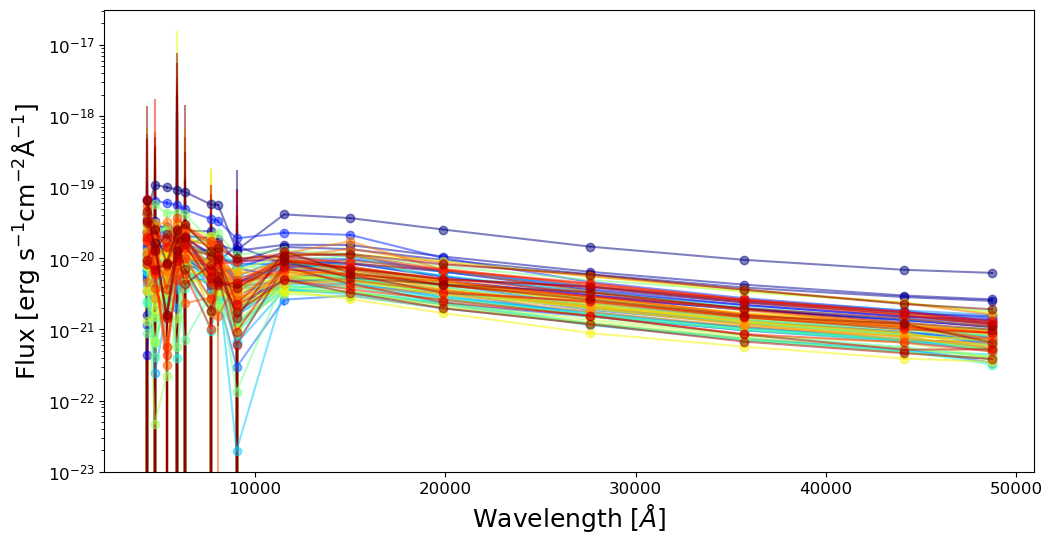

In [5]:
from piXedfit.piXedfit_bin import plot_bins_SED

binmap_fits = "pixbin_fluxmap.fits"
plot_bins_SED(binmap_fits, logscale_x=False)

## Plot the radial profiles of signal-to-noise rations

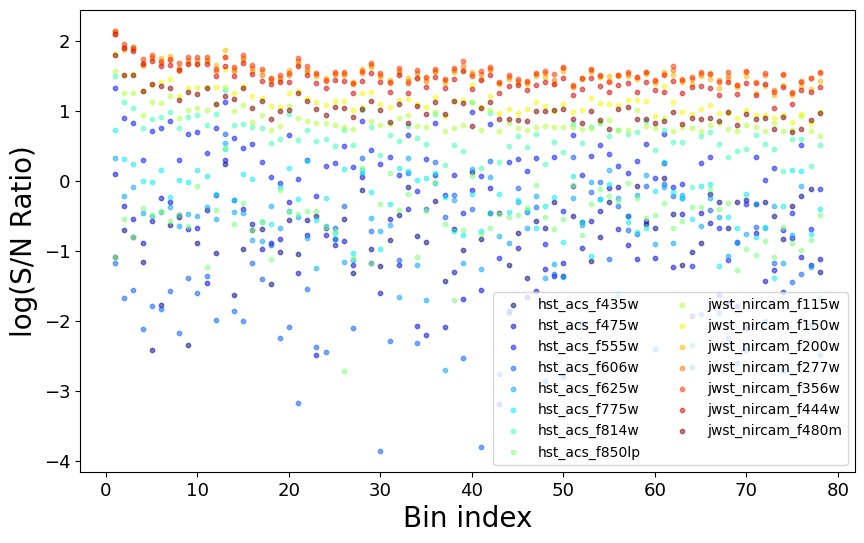

In [6]:
from piXedfit.piXedfit_bin import plot_bins_SNR_radial_profile

plot_bins_SNR_radial_profile(binmap_fits)